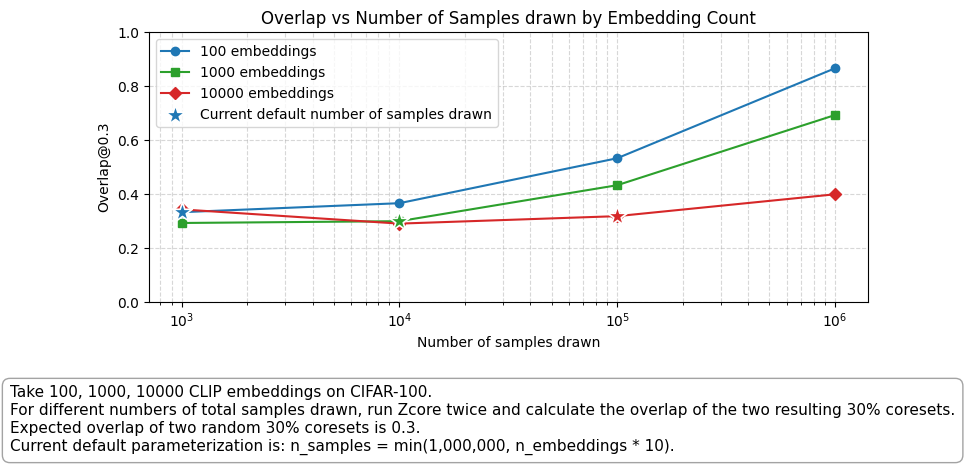

In [ ]:
import matplotlib.pyplot as plt

# Data: number of samples (x) vs overlap (y) per embedding count
data = {
    100: {
        "samples": [1000, 10000, 100000, 1000000],
        "overlaps": [0.3333333333333333, 0.36666666666666664, 0.5333333333333333, 0.8666666666666667],
    },
    1000: {
        "samples": [1000, 10000, 100000, 1000000],
        "overlaps": [0.29333333333333333, 0.3, 0.43333333333333335, 0.6933333333333334],
    },
    10000: {
        "samples": [1000, 10000, 100000, 1000000],
        "overlaps": [0.3436666666666667, 0.291, 0.31866666666666665, 0.39966666666666667],
    },
}

plt.figure(figsize=(8, 5))

markers = {100: "o", 1000: "s", 10000: "D"}
colors = {100: "#1f77b4", 1000: "#2ca02c", 10000: "#d62728"}

# Draw one curve for each embedding count
for emb_count, series in data.items():
    x = series["samples"]    # x-axis: number of samples
    y = series["overlaps"]   # y-axis: overlap
    plt.plot(x, y, marker=markers[emb_count], color=colors[emb_count],
             linestyle="-", label=f"{emb_count} embeddings")
    
# Scatter current default number of samples drawn for each embedding count
star_marker_label = "Current default number of samples drawn"
first_label = True
for emb_count, series in data.items():
    default_samples = min(1_000_000, emb_count * 10)
    if default_samples in series["samples"]:
        idx = series["samples"].index(default_samples)
        x = default_samples                      # x: samples
        y = series["overlaps"][idx]              # y: overlap at that sample
        plt.scatter(
            [x], [y],
            s=220, marker="*",                   # star marker
            color=colors[emb_count],             # match curve color
            edgecolor="white", linewidths=1.2, zorder=6,
            label=star_marker_label if first_label else None,
        )
        first_label = False

plt.xlabel("Number of samples drawn")
plt.ylabel("Overlap@0.3")
plt.title("Overlap vs Number of Samples drawn by Embedding Count")
plt.ylim(0, 1)
plt.grid(True, which="both", linestyle="--", alpha=0.5)
leg = plt.legend()

plt.xscale("log")

ax = plt.gca()
fig = ax.figure

caption = "\n".join([
    "Take 100, 1000, 10000 CLIP embeddings on CIFAR-100.",
    "For different numbers of total samples drawn, run Zcore twice and calculate the overlap of the two resulting 30% coresets.",
    "Expected overlap of two random 30% coresets is 0.3.",
    "Current default parameterization is: n_samples = min(1,000,000, n_embeddings * 10).",
])

# Make room at the bottom, then place caption
plt.tight_layout(rect=(0, 0.26, 1, 1))  # raise the plot a bit to fit 4 lines
fig.text(
    0.5, 0.08, caption,
    ha="center", va="bottom", fontsize=11,
    multialignment="left", linespacing=1.25,
    bbox=dict(facecolor="white", edgecolor="#999", alpha=0.9, boxstyle="round,pad=0.5"),
)
plt.show()

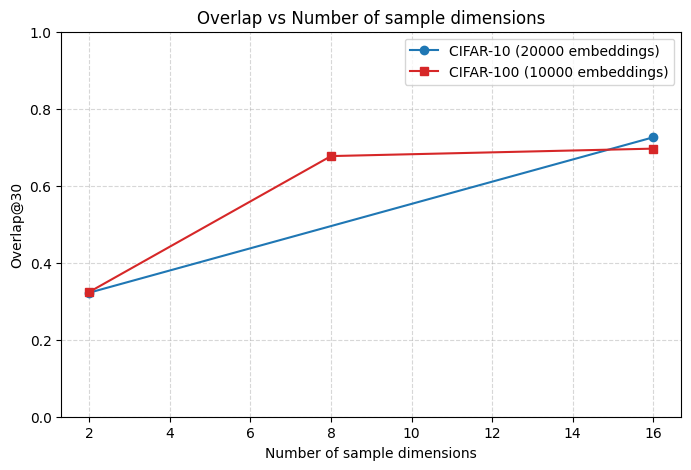

In [ ]:
# Data: Overlap@30 (y) vs d_dims (x)
data = {
    "CIFAR-10 (20000 embeddings)": {
        "d_dims": [2, 16],
        "overlaps": [0.32233333333333336, 0.7256666666666667],
    },
    "CIFAR-100 (10000 embeddings)": {
        "d_dims": [2, 8, 16],
        "overlaps": [0.3243333333333333, 0.677, 0.6963333333333334],
    },
}

plt.figure(figsize=(8, 5))

# Style similar to the existing figure
styles = {
    "CIFAR-10 (20000 embeddings)": {"marker": "o", "color": "#1f77b4"},
    "CIFAR-100 (10000 embeddings)": {"marker": "s", "color": "#d62728"},
}

# Draw one curve per dataset/embedding count
for label, series in data.items():
    x = series["d_dims"]
    y = series["overlaps"]
    order = sorted(range(len(x)), key=lambda i: x[i])  # ensure increasing x
    x_sorted = [x[i] for i in order]
    y_sorted = [y[i] for i in order]
    plt.plot(
        x_sorted, y_sorted,
        marker=styles[label]["marker"],
        color=styles[label]["color"],
        linestyle="-",
        label=label,
    )

plt.xlabel("Number of sample dimensions")
plt.ylabel("Overlap@0.3")
plt.title("Overlap vs Number of sample dimensions")
plt.ylim(0, 1)
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()

plt.show()